<a href="https://colab.research.google.com/github/CODERZZZ123/StockPred_NewsHeadlines/blob/master/pred_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import nltk.corpus
import re
nltk.download('stopwords')
nltk.download('wordnet')


from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
!pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import euclidean_distances
!pip install textattack

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.7/418.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 81.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 8.9 MB/s eta 

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# import requests
# import time

# while True:
#     try:
#         requests.get('https://www.google.com')
#         print("Kept alive.")
#     except:
#         print("Failed to keep alive.")
#     time.sleep(600)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from sklearn import  set_config
set_config(display = 'diagram')

In [5]:
df_NewsDjia = pd.read_csv('News_DJIA.csv', delimiter=',')
df_DjiaStock = pd.read_csv('DJIA_t.csv',delimiter=',')

In [6]:
df_DjiaStock

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [7]:
for i in df_NewsDjia.columns :
    df_NewsDjia[i] = df_NewsDjia[i].astype(str)

In [8]:
# df_NewsDjia

In [9]:
num_columns = df_NewsDjia.columns.shape[0]
col_names = df_NewsDjia.columns.values.tolist()
col_names = col_names[1:]
df_NewsDjia.loc[:, 'merged'] = " "
for each_col_ind in range(num_columns-1):
    df_NewsDjia.loc[:, 'merged'] =  df_NewsDjia.loc[:, 'merged'] + " " + df_NewsDjia[col_names[each_col_ind]] + " "

In [10]:
df_finalised = df_NewsDjia[['merged']]

In [11]:
date_numric_stopwords = "THOUSAND MILLION BILLION TRILLION HUNDRED ANNUAL ANNUALLY ANNUM YEAR YEARLY QUARTER QUARTERLY QTR MONTH MONTHLY WEEK WEEKLY DAY DAILY JANUARY FEBRUARY MARCH APRIL MAY JUNE JULY AUGUST SEPTEMBER OCTOBER NOVEMBER DECEMBER JAN FEB MAR APR MAY JUN JUL AUG SEP SEPT OCT NOV DEC MONDAY TUESDAY WEDNESDAY THURSDAY FRIDAY SATURDAY SUNDAY TWO THREE FOUR FIVE SIX SEVEN EIGHT NINE TEN ELEVEN TWELVE THIRTEEN FOURTEEN FIFTEEN SIXTEEN SEVENTEEN EIGHTEEN NINETEEN TWENTY THIRTY FORTY FIFTY SIXTY SEVENTY EIGHTY NINETY FIRST SECOND THIRD FOURTH FIFTH SIXTH SEVENTH EIGHTH NINTH TENTH II III IV V VI VII VIII IX X XI XII XIII XIV XV XVI XVII XVIII XIX XX"
date_numric_stopwords = date_numric_stopwords.lower()
date_numric_stopwords = date_numric_stopwords.split(" ")

In [12]:

def remove_unecssary_word(sent):
    sent = sent.replace("b'",'')
    sent = sent.replace('b"','')
    sent = sent.lower()
    sent = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", sent)
    stop = stopwords.words('english')
    stop.extend(date_numric_stopwords)
    sent = " ".join([word for word in sent.split() if word not in (stop)])
    sent = " ".join([WordNetLemmatizer().lemmatize(word) for word in sent.split() ])
    return sent

In [13]:
df_finalised['merged'] = df_finalised['merged'].apply(remove_unecssary_word)

<ipython-input-13-6847205c14ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalised['merged'] = df_finalised['merged'].apply(remove_unecssary_word)


In [14]:
df_finalised.iloc[0][0]

'0 georgia down russian warplane country move brink war breaking musharraf impeached russia today column troop roll south ossetia footage fighting youtube russian tank moving towards capital south ossetia reportedly completely destroyed georgian artillery fire afghan child raped impunity un official say sick old raped nothing 150 russian tank entered south ossetia whilst georgia shoot russian jet breaking georgia invades south ossetia russia warned would intervene so side enemy combatent trial nothing sham salim haman sentenced 5 12 year kept longer anyway feel like georgian troop retreat osettain capital presumably leaving several people killed video u prep georgia war russia rice give green light israel attack iran say u veto israeli military ops announcingclass action lawsuit behalf american public fbi sorussia georgia war nyts top story opening ceremony olympics fucking disgrace yet proof decline journalism china tell bush stay country affair world war start today georgia invades s

In [15]:
# from textattack.augmentation import EmbeddingAugmenter
# embed_aug = EmbeddingAugmenter()
# embed_aug.augment(df_finalised.iloc[0][0])

In [16]:
# from textattack.augmentation import WordNetAugmenter
# wordnet_aug = WordNetAugmenter()
# wordnet_aug.augment(df_finalised.iloc[0][0])

In [17]:
# from textattack.augmentation import EasyDataAugmenter
# eda_aug = EasyDataAugmenter()
# eda_aug.augment(df_finalised.iloc[0][0])

In [18]:
df_finalised = pd.concat([df_finalised,df_NewsDjia['Label']],axis = 1)

In [19]:
# Positive_word = ""
# with open('Positive_words.txt', 'r') as file:
#     Positive_word = file.read().replace('\n', '')
# Positive_word = " ".join([WordNetLemmatizer().lemmatize(word) for word in Positive_word.split(',') ])

In [20]:
# Negative_word = ""
# with open('Negative_words.txt','r') as file:
#     Negative_word = file.read().replace('\n','')
# Negative_word = " ".join([WordNetLemmatizer().lemmatize(word) for word in Negative_word.split(',') ])

In [21]:
# Positive_word = Positive_word.split(',')
# Negative_word = Negative_word.split(',')
# Negative_word = Negative_word[0].split()
# Positive_word = Positive_word[0].split()

In [22]:
# set_post = set(Positive_word)
# set_neg = set(Negative_word)
# def Count(obj):
#     count_post = 1
#     count_neg = 1
#     obj = obj.split()
#     for i in obj:
#         if i in set_post:
#             count_post = count_post + 1
#         elif i in set_neg:
#             count_neg = count_neg + 1
#     return count_post/count_neg


In [23]:
# df_finalised['ratio_pos_neg'] = df_finalised['merged'].apply(Count)
# ratio_column = df_finalised['ratio_pos_neg']
# ratio_column = np.array(ratio_column).reshape((-1,1))
X_data = df_finalised['merged']

In [24]:
Y_data = df_finalised['Label']
Y_data = Y_data.astype(int)

In [25]:
from textattack.augmentation import EasyDataAugmenter
eda_aug = EasyDataAugmenter()
data_X = []
label = []
# open('/content/drive/MyDrive/Colab Notebooks/Pred_stock_newheadline/data.txt', 'w').close()
# open('/content/drive/MyDrive/Colab Notebooks/Pred_stock_newheadline/label.txt','w').close()
with open('/content/drive/MyDrive/Colab Notebooks/Pred_stock_newheadline/data.txt', 'a') as f1 , open('/content/drive/MyDrive/Colab Notebooks/Pred_stock_newheadline/label.txt','a') as f2:
  for i in range(0,X_data.shape[0]):
    data_X.append(X_data[i])
    label.append(Y_data[i])
    f1.write(X_data[i])
    f1.write(",")
    y = str(Y_data[i])
    f2.write(y)
    f2.write(",")
    if i%10 == 0:
      data = eda_aug.augment(X_data[i])
      for d in data:
        data_X.append(d)
        label.append(Y_data[i])
        f1.write(d)
        f1.write(",")
        f2.write(y)
        f2.write(",")

    print(i)

In [26]:
Y_data = np.array(Y_data)
Y_data

array([0, 1, 0, ..., 1, 1, 1])

In [27]:
# X_data[0]

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
# data_X

In [30]:
data_augmented = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/Pred_stock_newheadline/data.txt',dtype = str , delimiter=",")

In [31]:
data_augmented.shape

(2864,)

In [32]:
count = 0
count2 = 0
for i in data_augmented:
    if len(i) != 0:
        if i[0] =='0' or i[0] == '1':
            if i[1] == " ":

              count = count + 1
    count2 = count2 + 1
print(count)
print(count2)

2788
2864


In [33]:
index = 0
for i in data_augmented:
  if len(i) != 0 :
    if i[0] != '1' and i[0] != '0' :
        data_augmented[index] = data_augmented[index-1][0] + " " + i
    index += 1

In [34]:
data_augmented.shape

(2864,)

In [35]:
data_augmented.shape

(2864,)

In [39]:
data_augmented = data_augmented[:-1]

In [40]:
label_updated = data_augmented.astype('<U1')

In [41]:
label_updated

array(['0', '0', '0', ..., '1', '1', '0'], dtype='<U1')

In [42]:
label_updated = label_updated.astype(np.float)

<ipython-input-42-39bc489429a0>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_updated = label_updated.astype(np.float)


In [43]:
data_augmented = list(data_augmented)

In [44]:
data_augmented = [i[2:] for i in data_augmented]

In [45]:
# data_augmented

In [46]:
X_data.shape

(1989,)

In [58]:
# x_train , x_test , y_train, y_test = train_test_split(data_augmented,label_updated , test_size = 0.2 , random_state = 10)
x_train , x_test , y_train , y_test = data_augmented[:2290] , data_augmented[2290:] , label_updated[:2290] , label_updated[2290:]

In [59]:
tf_idf = TfidfVectorizer(min_df=10)
x_train_tf = tf_idf.fit_transform(x_train)
x_test_tf = tf_idf.transform(x_test)
x_train = x_train_tf.toarray()
x_test = x_test_tf.toarray()

In [60]:
mean_not_zero = x_train[x_train != 0].mean()
x_train[x_train!=0] = x_train[x_train!=0] -  mean_not_zero
x_test[x_test != 0 ] = x_test[x_test != 0] - mean_not_zero

In [50]:
# ct_vect = CountVectorizer()
# x_train = ct_vect.fit_transform(x_train).toarray()
# x_test = ct_vect.transform(x_test).toarray()

In [61]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [52]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 90, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

KeyboardInterrupt: ignored

In [62]:
# VARIANCE EXPLAINED 90%
pca = PCA(0.80)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
pca.explained_variance_ratio_

array([0.00528039, 0.00433565, 0.00425906, 0.00419809, 0.0041099 ,
       0.0039548 , 0.00331512, 0.00287496, 0.00281073, 0.00277941,
       0.00275156, 0.00269365, 0.00267653, 0.00265729, 0.00265306,
       0.00260901, 0.00257548, 0.00256355, 0.00252813, 0.00250851,
       0.00244629, 0.00243647, 0.00241551, 0.00240192, 0.00239172,
       0.0023846 , 0.00236552, 0.00235674, 0.00233919, 0.00233204,
       0.00231509, 0.00230558, 0.00229246, 0.00226802, 0.00225806,
       0.00224583, 0.00224321, 0.00224052, 0.00222439, 0.00221704,
       0.00219784, 0.00219281, 0.00217833, 0.00216643, 0.00216387,
       0.00215079, 0.00213966, 0.00213525, 0.00212285, 0.00211535,
       0.00211004, 0.00209984, 0.00208285, 0.00207541, 0.00206394,
       0.00204547, 0.00204167, 0.00203333, 0.00201823, 0.00201413,
       0.00201172, 0.00200512, 0.00199494, 0.00198452, 0.00198059,
       0.00197628, 0.00197046, 0.00195858, 0.00195403, 0.0019451 ,
       0.00193426, 0.00192213, 0.00191162, 0.00189686, 0.00189

In [ ]:
# K = [int(i) for i in range(x_train.shape[0]//3)]
# param_grid = {
#     'n_neighbors' : K
# }
# knn = KNeighborsClassifier()
# grid_search = GridSearchCV(estimator=knn,scoring='accuracy',param_grid=param_grid,cv = 10,n_jobs = -1,verbose = 2)
# grid_search.fit(x_train,y_train)
# grid_search.best_estimator_
# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(x_train,y_train)
# y_pred = knn.predict(x_test)
# print(accuracy_score(y_pred,y_test))
# print(classification_report(y_pred,y_test))

In [63]:
C = [0.05 , 0.1 , 0.5  , 1 , 5 ]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale','auto']
degree = [int(x) for x in range(1,2)]
param_grid = {
    'kernel' : kernel,
    'gamma' : gamma,
    'degree' : degree,
    'C' : C
}
svc = SVC()
grid_search = GridSearchCV(estimator=svc,scoring='accuracy',param_grid=param_grid,cv = 5,n_jobs = -1,verbose = 6)
grid_search.fit(x_train,y_train)
best_gird_search = grid_search.best_estimator_
from sklearn.metrics import accuracy_score
y_pred = best_gird_search.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(accuracy_score(y_train,best_gird_search.predict(x_train)))
# Score = cross_val_score(best_gird_search,X_data,Y_data,cv = 5)
# Score

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[[ 60 222]
 [  0 291]]
Accuracy Score 0.612565445026178
0.9991266375545852


In [56]:
grid_search.best_params_

{'C': 0.5, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [54]:
from sklearn.metrics import accuracy_score
model = SVC(C = 1, degree= 4, gamma =  'auto', kernel = 'rbf')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy for the trained data is {}".format(accuracy_score(y_train,model.predict(x_train))))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("classification report {}".format(classification_report(y_test,y_pred)))
# Score = cross_val_score(model,X_data,Y_data,cv = 5)
# Score

[[216  66]
 [166 125]]
Accuracy for the trained data is 1.0
Accuracy Score 0.5951134380453752
classification report               precision    recall  f1-score   support

         0.0       0.57      0.77      0.65       282
         1.0       0.65      0.43      0.52       291

    accuracy                           0.60       573
   macro avg       0.61      0.60      0.58       573
weighted avg       0.61      0.60      0.58       573



In [ ]:
# !pip install tensorflow

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# model = Sequential()
# model.add(Dense(12,input_shape = (x_train.shape[1],),activation = 'relu'))
# model.add(Dense(8,activation = 'relu'))
# model.add(Dense(1,activation = 'sigmoid'))
# model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.fit(x_train,y_train,epochs=200,batch_size=1000)
# predictions = (model.predict(x_test) > 0.5).astype(int)
# abs(predictions.T - y_test).sum()/y_test.shape[0]


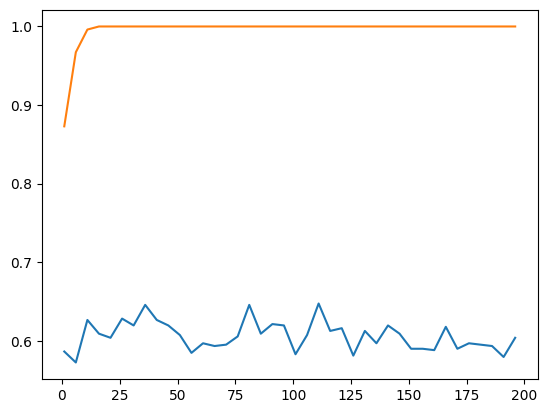

In [70]:
import matplotlib.pyplot as plt
score_test = []
score_train = []
scale = [i for i in range(1,200,5)]
for i in range(1 , 200 , 5):
  randomclassifier=RandomForestClassifier(n_estimators=i,criterion='entropy')
  randomclassifier.fit(x_train,y_train)
  predictions = randomclassifier.predict(x_test)
  predictions_train = randomclassifier.predict(x_train)
  score_test.append(accuracy_score(y_test,predictions))
  score_train.append(accuracy_score(y_train,predictions_train))
plt.plot(scale ,score_test )
plt.plot(scale ,score_train )
  # matrix=confusion_matrix(y_test,predictions)
# print(matrix)
# score=
# print(score)
# report=classification_report(y_test,predictions)
# print(report)